In [106]:
import os
import re
import pickle
import pandas as pd
import numpy as np
import warnings
import pickle
from gensim.test.utils import datapath
import pyLDAvis
import pyLDAvis.gensim
import gensim.corpora as corpora
from gensim.matutils import Sparse2Corpus
from tqdm import tqdm
from doc_from_topics import *
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
## get the dataframe

with open(f"../data/modeling/topic_dfs/topic_dfsH2_submissions_30.pkl", "rb") as f: 
    data = pickle.load(f)


In [17]:
## get the model

models = load_pickle("H2_submissions_b0.1_a0.01", "model")


In [19]:
## Get specific model
model = models["a0.01_b0.1_k30"]

In [29]:
model.get_term_topics("security", minimum_probability=0.0005)

[(2, 0.006483909),
 (7, 0.0005696766),
 (22, 0.0015319518),
 (24, 0.001235791),
 (26, 0.004410122),
 (27, 0.0012114715),
 (29, 0.009843452)]

In [16]:
data[data["Dominant_Topic"] == 7.0]["Keywords"].values[0]

'use, control, look, want, need, thank, home, get, work, go'

In [39]:
data['Dominant_Topic'].value_counts().plot(kind='barh') #baserate

<AxesSubplot:>

In [5]:
security_query = query_topic(data, 100000, "security", topic = False)

In [7]:
#topics to look out for, as they have security as a keyword:

set(security_query[security_query["Keywords"].str.contains("security")]["Dominant_Topic"])

{2.0, 29.0}

In [48]:
total_freqs = data["Dominant_Topic"].value_counts()

In [50]:
relative_freqs = security_query["Dominant_Topic"].value_counts()

In [55]:
relative_freqs.keys()

Float64Index([ 2.0,  7.0, 29.0, 26.0,  4.0, 27.0,  6.0,  0.0, 20.0, 24.0,  9.0,
              12.0, 22.0, 11.0, 23.0, 13.0, 25.0, 28.0, 15.0, 16.0,  1.0,  5.0,
              14.0,  3.0, 18.0, 19.0,  8.0],
             dtype='float64')

In [66]:
new_freqs = [(i, relative_freqs[i]/total_freqs[i]) for i in relative_freqs.keys()]
new_freqs = sorted(new_freqs, key = lambda x: x[1])
x = [i[0] for i in new_freqs]
y = [i[1] for i in new_freqs]

<BarContainer object of 27 artists>

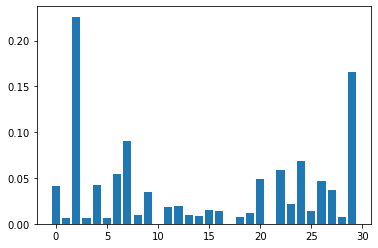

In [67]:
plt.bar(x, y)

Conclusion: The interesting topics are 2, 7 and 29. It should be noted that 7 is the largest topic, and does not have security as a keyword. Security is mentioned about 10% of the times in this topic. Topic 2 is hitting around 25% and Topic 29 at 17%.

In [5]:
## Camera topics

cam_sub = data[data["Keywords"].str.contains("camera")]

## It is only topic 29 which has camera in it

topic_df = topic_threshold(data, 29, 0.9) #subset of 0.9

topic_df["Text"].sample(10).values

array(['Wall Mount Like a Boss 😎 ',
       'Add an artistic touch to your space with sculptures ',
       'Camect NVR - what do you guys think? ',
       'For Those Looking For Wireless Home Security Camera System, Arlo Pro 2 Is At Lowest Price Ever [deleted]',
       'First impressions of iWalldock and iPad Pro 11" in-wall mount ',
       'Looking for IP cameras with local interface, PoE, no cloud [deleted]',
       'Considerations for a home security camera system [removed]',
       'For Those Looking For Wireless Home Security Camera System, Arlo Pro Indoor/Outdoor 4 camera kit Is At Lowest Price Ever [deleted]',
       'Is this a good security camera? [removed]',
       'Hikvision 1 MP EXIR Turret Camera '], dtype=object)

In [71]:
topic_df = topic_threshold(data, 2, 0.9)
topic_df["Text"].sample(10).values

#Mostly this is about garage doors and security systems concerning these doors

array(['Cheapest Solution for Multiple Doors Hello all, \n\nI\'ve been looking around at all the home lock options and trying to decide what to do with our new house. The issue here is there we have a lot of entry points into the house. We have the front door, the back door, the sliding glass doors at the deck, the garage doors, the side door on the garage, double opening glass doors on the garage, a second entrance at the in-law apartment on the second floor, then the entry into the house from the garage. If I were to get smart locks for all these doors (not sure there are options for some of these like the double glass doors that), it would ring up the bill quite a bit. What is your recommendation for a house with a lot of entrances? I thought about just the front door and the entrance to the garage, which is great from a "getting into your house in a smart way" perspective, but not a security perspective. Obviously, we can use dumb locks in other places, but if we enter from the gar

In [73]:
topic_df = topic_threshold(data, 7, 0.9)
topic_df["Text"].sample(10).values

# Does not really have that much to do with security. As mentioned, this only appears in the data as it is a huge topic. 

array(['Streaming - Cabin automation 300 kilometers from house! :-) Web interface with real-time datas  it was short stream',
       'Factors to Consider Before Purchasing a Mattress [deleted]',
       'Trying out hassio 2019 | Is it worth your time? ',
       'Best/Cheapest Smartlighting Solution? [deleted]',
       'I setup Home Assistant and CS:GO to trigger actual fire when the bomb goes off in the game ',
       'Started a project. A coat rack for my home. Not quite sure how I want to complete this yet. I’m open to suggestions, if any. Thanks! ',
       "Has anyone figure out a good solution for controlling the XG1v4 (BlueCurve) with Control4 Yes the IR works(kind of) but it doesn't quite do the trick. I have played with the ir bug position for hours and it's just not great.\n\nHas anyone figured out a good way to control it? \nIP Driver?\nTake it apart and place the IR bug inside?\nWould love a solution that doesn't take hours of troubleshooting to get terrible control in the end

In [80]:
## Let us do the same, but restrict the data to contain security and see how it is used:

topic_df = query_topic(data, 10, "security", topic = 2)["Text"].values
topic_df

## Mostly concerned with security systems for their home

array(["Looking for video doorbell as well as security camera options for parent's house My mom and step dad (60s) have just moved to a new house. They are in a very safe neighborhood, but their front door has no peephole and no windows to look out and see who is at the door. Normally I wouldn't be concerned, but my step dad's mom (80s) has gone completely r/JustNoMIL with threats against my mom and calling my step dad non stop to just yell at him about nonsense. She lives close to their house and, while hey son wants nothing to do with her, it's totally within her realm to show up unannounced. I just want them to be able to know who is at the door, but I'm also interested in getting them some security cameras for the back screened in porch and a few other windows. I'm not super tech savvy, but with instruction and YouTube I can figure most things out so I'm wondering what's my best option for something they will be able to use easily and will keep them safe.",
       "Replacing Vivint

In [81]:
## Let us do the same, but restrict the data to contain security and see how it is used:

topic_df = query_topic(data, 10, "security", topic = 7)["Text"].values
topic_df

## Mentions of security camera, but also other senses. Here is one guy with the more abstract notion of security.

array(['Arduino to simulate pressing button? So I live out in Asia now and have a garage that I would like to be able to automate/control from my phone so I don’t have to carry a bunch of these controllers everywhere I go. Can’t utilize any prebuilt stuff since the garage controllers are non-standardized and use undocumented RF and from what I understand a “Rolling code” security. \n\nI’m very new to arduino but I do have some basic programming skills, would like to ask if automating the key press is possible using arduino to simulate a key press on the physical remote (using servo) or soldering to close the circuit on the remote? \n\n I’ve done some research and it seems similar things have been done before. Hope someone can give me a little guidance if this is a feasible project for me to learn with some arduino kits. Parts are a plenty here but I don’t have a support group locally to help me\n\nThank you!',
       "Help with a starting point that is local network based. Could someon

In [82]:
topic_df = query_topic(data, 10, "security", topic = 29)["Text"].values
topic_df

## Security cameras (!!!) 

array(['Question about home security cameras I have recently purchased a wifi camera for in the home: [This one](https://www.amazon.com/D-Link-Camera-DCS-5020L-Certified-Refurbished/dp/B06Y3JWP5Y/ref=sr_1_3?ie=UTF8&amp;qid=1505839801&amp;sr=8-3&amp;keywords=d-link+camera).\n\nCan anybody tell me if there\'s a good, free, way to set this up so it records and saves ~12 hours of video. I have a spare PC in my house with about 1 TB of hard disk space. It would be neat if I could have it automatically save some video, however much is possible with that PC.\n\nThanks in advance! Thanks, it looks like i can download it, or purchase the "LE" or Full Version? Do I need purchase in order to use it? Or does it work with a free download? Are you British? Cool, thank you for this!',
       "Weather/Timelapse Webcam? I'm trying to find the best outdoor PoE webcam to be able to capture still images of landscape.  Unfortunately, everything I find seems to be video/security cameras.  I'd rather get a c

Overall: 
We find clear indications of users using security almost exclusively in relation to security cameras and security systems. They do not use security to pinpoint a worry concerning data use by companies. 

In [83]:
## Just to show that trust and privacy is not a thing:

privacy = query_topic(data, 100000, "privacy", topic = False)

<AxesSubplot:>

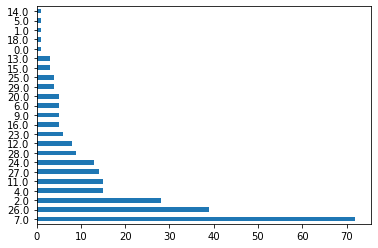

In [86]:
privacy['Dominant_Topic'].value_counts().plot(kind='barh') #baserate

In [88]:
privacy["Text"].sample(10).values

array(["Looking for a internet-enabled camera to monitor an elderly grandparent with Alzheimer's.... Here's the situation. Grandma is in a nursing home that takes specific care of the elderly with Alzheimer's. But she's falling, and no one really knows how or when it's happening.\n\nPer the nursing home's suggestion, we're looking for an internet (wifi) enabled camera we can setup in her room to keep an eye on her, rewind footage to see when/how she falls, etc.\n\nRequirements:\n\n* Privacy -- we must have it password protected so that ONLY designated family can see it. It's going to be in her living quarters, so we want to help her while protecting her privacy and dignity. \n* Small &amp; discrete -- it will have to sit (be bolted/screwed) onto a shelf.\n* Weird request -- grandma loves to unplug things. Sadly, she doesn't remember to leave essential things plugged in. I have no idea how to combat this. I'm open to ideas.\n* Nighttime vision -- she gets up in the middle of the night w

In [89]:
trust = query_topic(data, 100000, "trust", topic = False)

<AxesSubplot:>

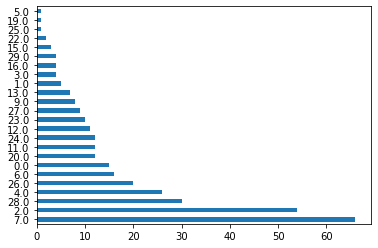

In [90]:
trust['Dominant_Topic'].value_counts().plot(kind='barh') #baserate

In [91]:
trust["Text"].sample(10).values

 people with your home and/or valuables. This thing will unlock your house when you are gone. Your pets will get out. People will get in. And all your stuff will be lost.\n\nThis thing is dangerous, and the support is pretty much non-existent.',
       'Smart thermostat (Ecobee) installation pain with Rheem Ruud A/C Unit EDIT: Due to time constraints, we ended up just hiring an HVAC tech that we trust and had done some jobs for us in the past. After 2hrs, he had the whole system rewired and it works.\n\nI’m going to crosspost this here out of desperation. I hope someone can help me out here cause I have two little ones and this AC unit is making their nights miserable.\n\nHere’s a picture of the current thermostat wiring and the schematics for the control board:\n\nhttps://imgur.com/gallery/Zb5Nb\n\nHere are some pics of the control board along with a pic of the currently nutted wires:\n\nhttps://imgur.com/gallery/AfJlH\n\nLet me start of by saying that the optional heating element is 

Lets have a more detailed look at the most interesting topics concerning security (2,7,29):


In [104]:
corpus = load_pickle("H2_submissions_corpus", "corpus")
dictionary = load_pickle("H2_submissions_dct", "corpus")
from collections import Counter

In [115]:
# Keep an eye on common words that occur in multiple topics and the one
# whose relative frequency is more than the weight. >> those should be added to stop_words

topics = model.show_topics(num_topics = 30, num_words = 20, formatted=False)
topics = [(x, dist) for (x, dist) in topics if x in [2, 7, 29]]
topic_num = [x for (x, dist) in topics]


def corpus2token_text(corpus, dictionary):
    nested_doc = []
    texts = []
    for doc in corpus:
        nested_doc.append([[dictionary[k]]*v for (k, v) in doc])
    for doc in nested_doc:
        texts.append([item for sublist in doc for item in sublist])
    return texts

texts = corpus2token_text(corpus, dictionary)

data_flat = [word for doc in texts for word in doc]

# words stored as dict keys and their count as dict values
counter = Counter(data_flat)

out = []
for num, dist in topics:
    # relative weight to the topic
    for word, weight in dist:
        out.append([word, num, weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'weight', 'word_count'])    

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(1, 3, figsize=(150,100), sharey=True, dpi=160)
cols = list(list(mcolors.TABLEAU_COLORS.values())*2)
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==topic_num[i], :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="weight", data=df.loc[df.topic_id==topic_num[i], :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i], fontsize=70)
    #ax_twin.set_ylim(0.0001, 0.0500); ax.set_ylim(0, 10000)
    ax.set_title('Topic: ' + str(topic_num[i]), color=cols[i], fontsize=100)
    ax.tick_params(axis='y', left=False, labelsize=70)
    ax_twin.tick_params(axis='y', labelsize=70)
    ax.set_xticklabels(df.loc[df.topic_id==topic_num[i], 'word'], rotation=30, horizontalalignment= 'right', fontsize=70)
    ax.legend(loc='upper left', fontsize=70); ax_twin.legend(loc='upper right', fontsize=70)

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and weight of Topic Keywords', fontsize=200, y=1.05)    
plt.show()